In [78]:
import numpy as np
import pandas as pd
#from io import StringIO
import os
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings

# Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
h = 8
w = h*1.61803398875
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 26}

plt.rc('font', **font)

from matplotlib import rc
plt.rc('font',**{'family':'serif','serif':['Times New Roman']})
plt.rc('text', usetex=True)
plt.rc({'figure.autolayout': True})

h = 8
w = 8*1.61803398875

In [79]:
# Data the KB Curve is Based Upon
working_dir = os.path.join(os.path.expanduser("~"), "Documents/github/comprehensive/")
data_path = "4_analysis/standoff_cost_protective_design/cost_standoff.csv"
filePath = os.path.join(working_dir, data_path)
cs = pd.read_csv(filePath)
cs

,x_ft,total,hardening,land_perimeter,frame,window_wall,progressive_collapse,other
0,3.489,86.803,76.449,NaN,51.400,20.905,14.043,3.449
1,4.480,84.489,74.513,NaN,49.318,20.851,13.999,3.436
2,6.131,79.951,71.100,NaN,45.824,20.764,13.928,3.413
3,6.461,79.003,70.409,1.437,45.119,20.747,13.913,3.407
4,8.773,73.099,65.751,1.550,40.348,20.641,13.822,3.357
...,...,...,...,...,...,...,...,...
109,149.802,105.108,27.419,88.068,13.429,10.002,13.428,3.150
110,150.133,105.189,27.418,88.383,13.428,9.973,13.428,3.150
111,150.463,105.268,27.417,88.696,13.428,9.944,13.428,3.150
112,150.793,105.344,27.416,89.009,13.428,9.915,13.428,3.150


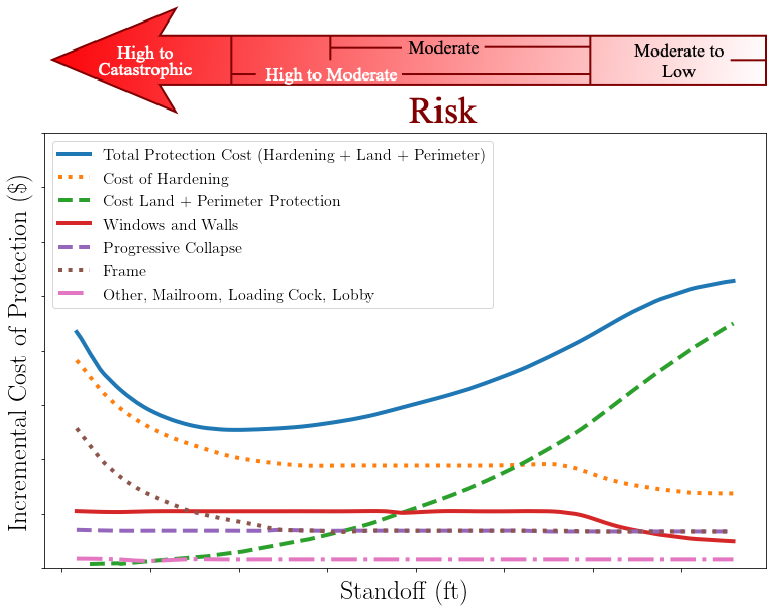

In [80]:
fig, ax = plt.subplots(figsize = (w,h));
plt.plot(cs.x_ft, cs.total, label = "Total Protection Cost (Hardening + Land + Perimeter)", linestyle = 'solid', linewidth = 4);
plt.plot(cs.x_ft, cs.hardening, label = "Cost of Hardening", linestyle = 'dotted', linewidth = 4);
plt.plot(cs.x_ft, cs.land_perimeter, label = "Cost Land + Perimeter Protection", linestyle = 'dashed', linewidth = 4);
plt.plot(cs.x_ft, cs.window_wall, label = "Windows and Walls", linestyle = 'solid', linewidth = 4);
plt.plot(cs.x_ft, cs.progressive_collapse, label = "Progressive Collapse", linestyle = '--', linewidth = 4);
plt.plot(cs.x_ft, cs.frame, label = "Frame", linestyle = ':', linewidth = 4);
plt.plot(cs.x_ft, cs.other, label = "Other, Mailroom, Loading Cock, Lobby", linestyle = '-.', linewidth = 4);
plt.legend(loc = 'best', fontsize = 16);
plt.xlabel(r'Standoff (ft)');
plt.ylabel(r'Incremental Cost of Protection (\$)');
# Turn off tick labels
plt.ylim(0,160);
ax.set_yticklabels([]);
ax.set_xticklabels([]);
img_dir = os.path.join(os.path.expanduser("~"), "Documents/github/comprehensive/4_analysis/standoff_cost_protective_design/")
img_path = "risk.png"
imgPath = os.path.join(img_dir, img_path)
im = plt.imread(imgPath)
newax = fig.add_axes([0.13, .8, 0.77, 0.3], anchor='NE');
newax.imshow(im);
newax.axis('off');
plot_dir = os.path.join(os.path.expanduser("~"), "Documents/github/comprehensive/5_reports/figures/");
plot_path = "standoff_cost.png";
plotPath = os.path.join(plot_dir, plot_path);
plt.savefig(plotPath, bbox_inches = "tight");